In [ ]:
import pandas as pd

df2 = pd.read_csv('/content/parkinsons_updrs.csv')

df2.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
print("Sample rows:")
print(df2.head())

print("\nDataset Info:")
print(df2.info())

print("\nMissing Values:")
print(df2.isnull().sum())

print("\nStatistical Summary:")
print(df2.describe())

Sample rows:
   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df2 = df2.drop(columns=['subject#'])

# df2 = df2.drop(columns=['test_time'])
# # df2 = df2.drop(columns=['RPDE'])
# # df2 = df2.drop(columns=['DFA'])
# # df2 = df2.drop(columns=['PPE'])
# df2 = df2.drop(columns=['age'])
# df2 = df2.drop(columns=['sex'])

df2.rename(columns={
    "Jitter:PPQ5": "Jitter:PPQ"
}, inplace=True)

y_motor = df2['motor_UPDRS']
y_total = df2['total_UPDRS']
X = df2.drop(columns=['motor_UPDRS', 'total_UPDRS'])

X_train, X_test, y_motor_train, y_motor_test = train_test_split(
    X, y_motor, test_size=0.2, random_state=42
)
_, _, y_total_train, y_total_test = train_test_split(
    X, y_total, test_size=0.2, random_state=42
)

scaler2 = StandardScaler()
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

print("✅ Shapes:")
print("X_train:", X_train_scaled.shape, " | y_motor:", y_motor_train.shape)
print("X_test :", X_test_scaled.shape, " | y_total:", y_total_test.shape)


✅ Shapes:
X_train: (4700, 19)  | y_motor: (4700,)
X_test : (1175, 19)  | y_total: (1175,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=200),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=300, learning_rate=0.1)
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    return mae, rmse, r2

results_motor = {}
results_total = {}

for name, model in models.items():
    mae, rmse, r2 = evaluate_model(model, X_train_scaled, y_motor_train, X_test_scaled, y_motor_test)
    results_motor[name] = (mae, rmse, r2)

    mae, rmse, r2 = evaluate_model(model, X_train_scaled, y_total_train, X_test_scaled, y_total_test)
    results_total[name] = (mae, rmse, r2)

print("📊 Motor UPDRS Results:")
for name, metrics in results_motor.items():
    print(f"{name:20s} MAE={metrics[0]:.3f}  RMSE={metrics[1]:.3f}  R²={metrics[2]:.3f}")

print("\n📊 Total UPDRS Results:")
for name, metrics in results_total.items():
    print(f"{name:20s} MAE={metrics[0]:.3f}  RMSE={metrics[1]:.3f}  R²={metrics[2]:.3f}")


📊 Motor UPDRS Results:
Linear Regression    MAE=6.353  RMSE=7.484  R²=0.122
Random Forest        MAE=0.615  RMSE=1.308  R²=0.973
XGBoost              MAE=0.917  RMSE=1.461  R²=0.967

📊 Total UPDRS Results:
Linear Regression    MAE=8.054  RMSE=9.660  R²=0.158
Random Forest        MAE=0.721  RMSE=1.581  R²=0.977
XGBoost              MAE=1.155  RMSE=1.873  R²=0.968


In [ ]:
rf_motor = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)
rf_total = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)

rf_motor.fit(X_train_scaled, y_motor_train)
rf_total.fit(X_train_scaled, y_total_train)

def evaluate(model, X_test, y_test, label):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"📊 {label} Results:")
    print(f"MAE={mae:.3f}  RMSE={rmse:.3f}  R²={r2:.3f}")
    return mae, rmse, r2

evaluate(rf_motor, X_test_scaled, y_motor_test, "Motor UPDRS")
evaluate(rf_total, X_test_scaled, y_total_test, "Total UPDRS")

📊 Motor UPDRS Results:
MAE=1.225  RMSE=2.271  R²=0.919
📊 Total UPDRS Results:
MAE=1.217  RMSE=2.066  R²=0.961


(1.217158008695456, np.float64(2.065512869615148), 0.9614996277812703)


🔥 Top 10 Important Features for Motor UPDRS:
age             0.702186
DFA             0.078917
test_time       0.064941
sex             0.060679
Jitter(Abs)     0.019448
HNR             0.016301
PPE             0.010253
NHR             0.007330
Shimmer:APQ5    0.005912
RPDE            0.005626
dtype: float64


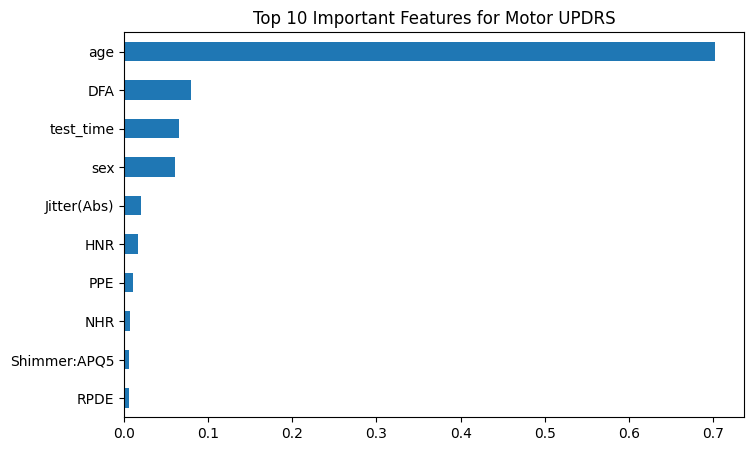

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Motor UPDRS importance
motor_importance = pd.Series(rf_motor.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n🔥 Top 10 Important Features for Motor UPDRS:")
print(motor_importance.head(10))

plt.figure(figsize=(8,5))
motor_importance.head(10).plot(kind="barh")
plt.title("Top 10 Important Features for Motor UPDRS")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

df2 = pd.read_csv("/content/parkinsons_updrs.csv")
df2 = df2.drop(columns=["subject#"])

top_features = ["age", "sex", "test_time", "Jitter(Abs)", "HNR", "NHR", "Shimmer:APQ5", "RPDE", "DFA", "PPE"]

y_motor = df2["motor_UPDRS"]
y_total = df2["total_UPDRS"]
X = df2[top_features]

X_train, X_test, y_motor_train, y_motor_test = train_test_split(X, y_motor, test_size=0.2, random_state=42)
_, _, y_total_train, y_total_test = train_test_split(X, y_total, test_size=0.2, random_state=42)

scaler1 = StandardScaler()
X_train_scaled = scaler1.fit_transform(X_train)
X_test_scaled = scaler1.transform(X_test)

rf_motor = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)
rf_total = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)

rf_motor.fit(X_train_scaled, y_motor_train)
rf_total.fit(X_train_scaled, y_total_train)

def evaluate(model, X_test, y_test, name):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"{name} → MAE={mae:.3f}, RMSE={rmse:.3f}, R²={r2:.3f}")

evaluate(rf_motor, X_test_scaled, y_motor_test, "Motor UPDRS")
evaluate(rf_total, X_test_scaled, y_total_test, "Total UPDRS")

import pickle

# Save Motor UPDRS model
with open("motor_updrs_model_age.pkl", "wb") as f:
    pickle.dump(rf_motor, f)

# Save Total UPDRS model
with open("total_updrs_model_age.pkl", "wb") as f:
    pickle.dump(rf_total, f)

# Save Regression Scaler
with open("scaler_regression_age.pkl", "wb") as f:
    pickle.dump(scaler1, f)

print("✅ Saved retrained regression models & scaler.")

Motor UPDRS → MAE=1.203, RMSE=2.273, R²=0.919
Total UPDRS → MAE=1.174, RMSE=2.051, R²=0.962
✅ Saved retrained regression models & scaler.


In [ ]:
rf_motor = RandomForestRegressor().fit(X_train_scaled, y_motor_train)
importances = pd.Series(rf_motor.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

age             0.670238
test_time       0.078763
DFA             0.077878
sex             0.071865
Jitter(Abs)     0.025365
Shimmer:APQ5    0.023879
HNR             0.019523
PPE             0.012899
NHR             0.010451
RPDE            0.009139
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

df2 = pd.read_csv("/content/parkinsons_updrs.csv")
df2 = df2.drop(columns=["subject#"])

top_features = ["sex", "test_time", "Jitter(Abs)", "HNR", "NHR", "Shimmer:APQ5", "RPDE", "DFA", "PPE"]

y_motor = df2["motor_UPDRS"]
y_total = df2["total_UPDRS"]
X = df2[top_features]

X_train, X_test, y_motor_train, y_motor_test = train_test_split(X, y_motor, test_size=0.2, random_state=42)
_, _, y_total_train, y_total_test = train_test_split(X, y_total, test_size=0.2, random_state=42)

scaler2 = StandardScaler()
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

rf_motor = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)
rf_total = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)

rf_motor.fit(X_train_scaled, y_motor_train)
rf_total.fit(X_train_scaled, y_total_train)

def evaluate(model, X_test, y_test, name):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"{name} → MAE={mae:.3f}, RMSE={rmse:.3f}, R²={r2:.3f}")

evaluate(rf_motor, X_test_scaled, y_motor_test, "Motor UPDRS")
evaluate(rf_total, X_test_scaled, y_total_test, "Total UPDRS")

import pickle

# Save Motor UPDRS model
with open("motor_updrs_model_without_age.pkl", "wb") as f:
    pickle.dump(rf_motor, f)

# Save Total UPDRS model
with open("total_updrs_model_without_age.pkl", "wb") as f:
    pickle.dump(rf_total, f)

# Save Regression Scaler
with open("scaler_regression_without_age.pkl", "wb") as f:
    pickle.dump(scaler2, f)

print("✅ Saved retrained regression models & scaler.")

Motor UPDRS → MAE=5.030, RMSE=6.366, R²=0.365
Total UPDRS → MAE=6.605, RMSE=8.496, R²=0.349
✅ Saved retrained regression models & scaler.


In [ ]:
rf_motor = RandomForestRegressor().fit(X_train_scaled, y_motor_train)
importances = pd.Series(rf_motor.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

DFA             0.182627
HNR             0.141091
PPE             0.119714
test_time       0.118244
Jitter(Abs)     0.109181
Shimmer:APQ5    0.108370
RPDE            0.105826
NHR             0.079150
sex             0.035796
dtype: float64


In [ ]:
# import os
# import joblib
# import pickle

# # Ensure folder exists
# os.makedirs("models", exist_ok=True)

# # Save trained regression models
# joblib.dump(rf_motor, "models/motor_updrs_model.pkl")
# joblib.dump(rf_total, "models/total_updrs_model.pkl")

# # ✅ Save the regression scaler
# with open("models/scaler_regression.pkl", "wb") as f:
#     pickle.dump(scaler2, f)

# print("✅ Both regression models and scaler saved successfully in 'models/'")
